# 1. Judul Laporan :
## "Perbandingan Algoritma Rekursif & Iteratif Dalam Pembangunan Pohon Huffman"

# 2. Nama Anggota Kelompok :
## A. Joel Fransiskus Parulian Sitorus (2311110011)
## B. Ferdinan Silaen (2311110068)

# 3. Deskripsi Studi Kasus Permasalahan
## Studi kasus ini membahas permasalahan kompresi data teks menggunakan algoritma Huffman. Algoritma Huffman adalah metode kompresi data yang efisien untuk data teks dengan frekuensi karakter yang berbeda-beda. Permasalahan yang dihadapi adalah memilih metode yang paling efisien untuk membangun pohon Huffman, yaitu antara metode rekursif dan iteratif.

# 4. Deskripsi Dua Algoritma yang Dipilih untuk Menyelesaikan Permasalahan
## Algoritma Rekursif
Algoritma rekursif untuk membangun pohon Huffman melibatkan penggabungan dua node dengan frekuensi terendah secara berulang hingga hanya tersisa satu node. Proses ini dilakukan secara rekursif dengan memanggil fungsi build_huffman_tree_recursive secara berulang.

#Algoritma Iteratif
Algoritma iteratif untuk membangun pohon Huffman melibatkan penggabungan dua node dengan frekuensi terendah secara berulang hingga hanya tersisa satu node. Proses ini dilakukan secara iteratif dengan menggunakan loop while dan struktur data heap.

# Langkah 1 : Impor Library Yang Dibutuhkan

In [24]:
import time
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from collections import Counter
from heapq import heappush, heappop, heapify

# Langkah 2 : Definisikan Kelas Node Untuk Pohon Huffman

In [25]:
class Node:
    def __init__(self, char, freq):
        self.char = char
        self.freq = freq
        self.left = None
        self.right = None

    def __lt__(self, other):
        return self.freq < other.freq

    def __eq__(self, other):
        if other is None:
            return False
        if not isinstance(other, Node):
            return False
        return self.freq == other.freq

# Langkah 3 : Fungsi Untuk Menghitung Frekuensi Karakter

In [26]:
def calculate_frequency(data):
    return Counter(data)

# Langkah 4 : Fungsi Untuk Membangun Pohon Huffman (Iteratif)


In [27]:
def build_huffman_tree_iterative(frequency):
    heap = [[weight, Node(char, weight)] for char, weight in frequency.items()]
    heapify(heap)
    while len(heap) > 1:
        lo = heappop(heap)
        hi = heappop(heap)
        merged = Node(None, lo[0] + hi[0])
        merged.left = lo[1]
        merged.right = hi[1]
        heappush(heap, [merged.freq, merged])
    return heappop(heap)[1]

# Langkah 5 : Fungsi Untuk Membangun Pohon Huffman (Rekursif)

In [28]:
def build_huffman_tree_recursive(heap):
    if len(heap) == 1:
        return heappop(heap)[1]
    lo = heappop(heap)
    hi = heappop(heap)
    merged = Node(None, lo[0] + hi[0])
    merged.left = lo[1]
    merged.right = hi[1]
    heappush(heap, [merged.freq, merged])
    return build_huffman_tree_recursive(heap)

# Langkah 6 : Fungsi Untuk Menghasilkan Kode Huffman

In [29]:
def generate_codes(node, prefix="", codebook={}):
    if node is not None:
        if node.char is not None:
            codebook[node.char] = prefix
        generate_codes(node.left, prefix + "0", codebook)
        generate_codes(node.right, prefix + "1", codebook)
    return codebook

# Langkah 7 : Fungsi Untuk Memperbarui Grafik

In [30]:
def update_graph(n_values, recursive_times, iterative_times):
    plt.clf()
    plt.plot(n_values, recursive_times, label='Rekursif', marker='o', linestyle='-')
    plt.plot(n_values, iterative_times, label='Iteratif', marker='o', linestyle='-')
    plt.title('Perbandingan Kinerja : Rekursif VS Iteratif')
    plt.xlabel('Ukuran Input (n)')
    plt.ylabel('Waktu Eksekusi (Detik)')
    plt.legend()
    plt.grid(True)
    plt.draw()

# Langkah 8 : Fungsi Untuk Mencetak Tabel Waktu Eksekusi

In [31]:
def print_execution_table(n_values, recursive_times, iterative_times):
    table = PrettyTable()
    table.field_names = ["n", "Waktu Rekursif (s)", "Waktu Iteratif (s)"]
    min_len = min(len(n_values), len(recursive_times), len(iterative_times))
    for i in range(min_len):
        table.add_row([n_values[i], recursive_times[i], iterative_times[i]])
    print(table)

# Langkah 9 : Program Utama


Masukkan Teks (Atau Ketik 'exit' Untuk Keluar) : ogenki desuka
+----+-----------------------+------------------------+
| n  |   Waktu Rekursif (s)  |   Waktu Iteratif (s)   |
+----+-----------------------+------------------------+
| 13 | 2.143383026123047e-05 | 3.2734870910644534e-05 |
+----+-----------------------+------------------------+


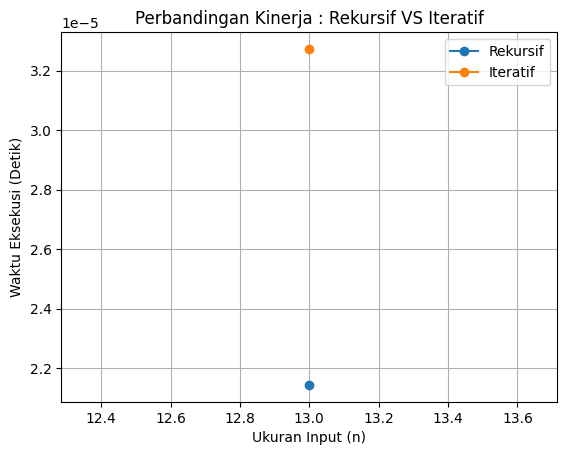

Masukkan Teks (Atau Ketik 'exit' Untuk Keluar) : Watashi wa gakusei desu
+----+------------------------+------------------------+
| n  |   Waktu Rekursif (s)   |   Waktu Iteratif (s)   |
+----+------------------------+------------------------+
| 13 | 2.143383026123047e-05  | 3.2734870910644534e-05 |
| 23 | 2.5892257690429686e-05 | 3.266334533691406e-05  |
+----+------------------------+------------------------+


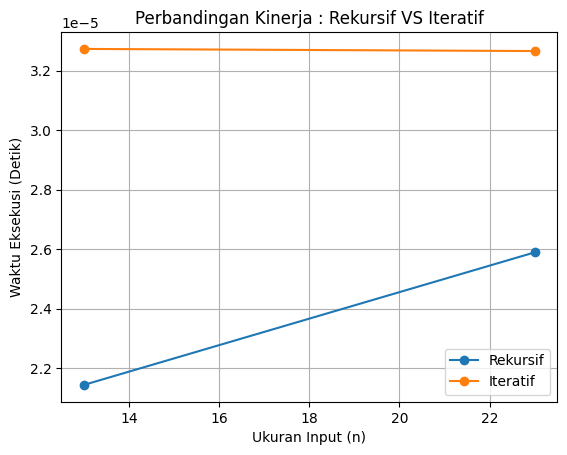

Masukkan Teks (Atau Ketik 'exit' Untuk Keluar) : Nihonjin wa biiru wo nomu no ga suki desu
+----+------------------------+------------------------+
| n  |   Waktu Rekursif (s)   |   Waktu Iteratif (s)   |
+----+------------------------+------------------------+
| 13 | 2.143383026123047e-05  | 3.2734870910644534e-05 |
| 23 | 2.5892257690429686e-05 | 3.266334533691406e-05  |
| 41 | 4.532337188720703e-05  |  5.76019287109375e-05  |
+----+------------------------+------------------------+


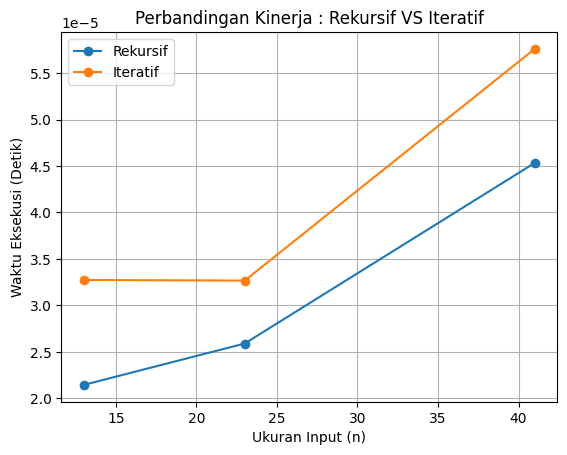

Masukkan Teks (Atau Ketik 'exit' Untuk Keluar) : Watashi wa neko yori inu no hou ga suki desu
+----+------------------------+------------------------+
| n  |   Waktu Rekursif (s)   |   Waktu Iteratif (s)   |
+----+------------------------+------------------------+
| 13 | 2.143383026123047e-05  | 3.2734870910644534e-05 |
| 23 | 2.5892257690429686e-05 | 3.266334533691406e-05  |
| 41 | 4.532337188720703e-05  |  5.76019287109375e-05  |
| 44 | 5.8817863464355466e-05 |  7.89642333984375e-05  |
+----+------------------------+------------------------+


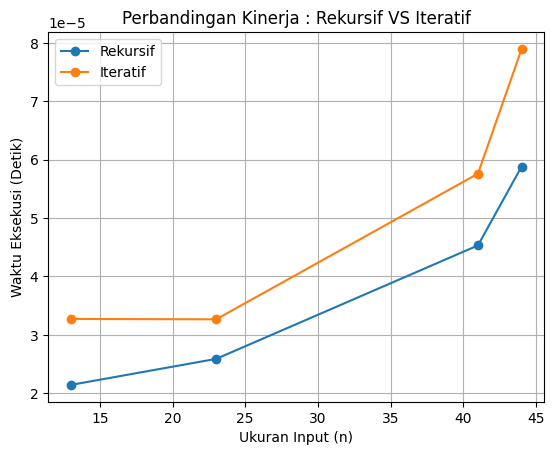

Masukkan Teks (Atau Ketik 'exit' Untuk Keluar) : Ano hito wa eigo ga jouzuna ueni kankokugo mo jouzu desu
+----+------------------------+------------------------+
| n  |   Waktu Rekursif (s)   |   Waktu Iteratif (s)   |
+----+------------------------+------------------------+
| 13 | 2.143383026123047e-05  | 3.2734870910644534e-05 |
| 23 | 2.5892257690429686e-05 | 3.266334533691406e-05  |
| 41 | 4.532337188720703e-05  |  5.76019287109375e-05  |
| 44 | 5.8817863464355466e-05 |  7.89642333984375e-05  |
| 56 | 3.3473968505859376e-05 | 4.274845123291016e-05  |
+----+------------------------+------------------------+


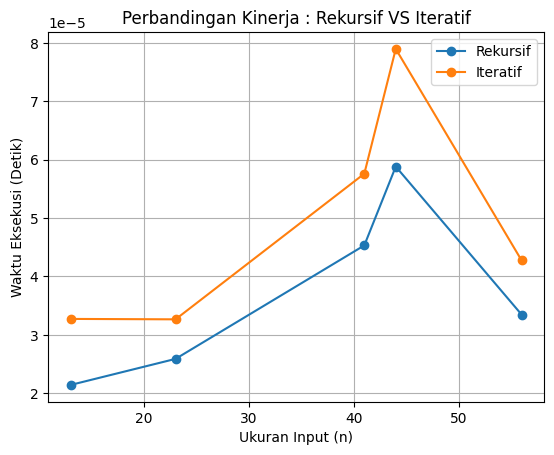

Masukkan Teks (Atau Ketik 'exit' Untuk Keluar) : exit
Program Telah Selesai. Terima Kasih!!


In [32]:
n_values = []
recursive_times = []
iterative_times = []

# Mode Interaktif Matplotlib
plt.ion()

while True:
    # Meminta Input Teks Dari Pengguna
    data = input("Masukkan Teks (Atau Ketik 'exit' Untuk Keluar) : ")
    if data.lower() == 'exit':
        print("Program Telah Selesai. Terima Kasih!!")
        break

    # Menghitung Ukuran Input Teks Berdasarkan Panjang Teks
    n = len(data)
    n_values.append(n)

    frequency = calculate_frequency(data)
    heap = [[weight, Node(char, weight)] for char, weight in frequency.items()]
    heapify(heap)

    # Ulangi Pengukuran Waktu Eksekusi Beberapa Kali
    recursive_time_sum = 0
    iterative_time_sum = 0
    # Jumlah Pengukuran
    num_runs = 10

    for _ in range(num_runs):
        start_time = time.time()
        huffman_tree_recursive = build_huffman_tree_recursive(heap[:])
        recursive_time_sum += time.time() - start_time

        start_time = time.time()
        huffman_tree_iterative = build_huffman_tree_iterative(frequency)
        iterative_time_sum += time.time() - start_time

    recursive_times.append(recursive_time_sum / num_runs)
    iterative_times.append(iterative_time_sum / num_runs)

    print_execution_table(n_values, recursive_times, iterative_times)
    update_graph(n_values, recursive_times, iterative_times)
    # Memberikan Jeda Sebentar Untuk Memperbarui Grafik
    plt.pause(0.1)

# Menonaktifkan Mode Interaktif Matplotlib
plt.ioff()
# Menampilkan Grafik Terakhir
plt.show()